# Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data

In [27]:
# Let's open the readme file to see what we have to do.
with open('../src/data/README') as f:
    # Separate the lines of the file in \n
    lines = f.read().split('\n')
lines

['SUMMARY & USAGE LICENSE',
 '=============================================',
 '',
 'MovieLens data sets were collected by the GroupLens Research Project',
 'at the University of Minnesota.',
 ' ',
 'This data set consists of:',
 '\t* 100,000 ratings (1-5) from 943 users on 1682 movies. ',
 '\t* Each user has rated at least 20 movies. ',
 '        * Simple demographic info for the users (age, gender, occupation, zip)',
 '',
 'The data was collected through the MovieLens web site',
 '(movielens.umn.edu) during the seven-month period from September 19th, ',
 '1997 through April 22nd, 1998. This data has been cleaned up - users',
 'who had less than 20 ratings or did not have complete demographic',
 'information were removed from this data set. Detailed descriptions of',
 'the data file can be found at the end of this file.',
 '',
 'Neither the University of Minnesota nor any of the researchers',
 'involved can guarantee the correctness of the data, its suitability',
 'for any particular 

In [21]:
# Let's see what that we have.
info_df = pd.read_csv('../src/data/u.info', header=None)
info_df

,0
0,943 users
1,1682 items
2,100000 ratings


In [18]:
# Let's load the rating data.
rating_df = pd.read_csv('../src/data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Print the shape and the first 5 rows of the dataframe.
print(rating_df.shape)
rating_df.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [91]:
# Let's load the movie data.
col_movies_name = ['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
                    'unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
                    'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror',
                    'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']
movie_df = pd.read_csv('../src/data/u.item', sep='|', names=col_movies_name, encoding='latin-1')

# Print the shape and the first 5 rows of the dataframe.
print(movie_df.shape)
movie_df.head()

(1682, 24)


,item_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# Convert release_date to datetime.
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format='%d-%b-%Y')

# Drop the rows with NaN values in release_date.
movie_df.dropna(subset=['release_date'], inplace=True)

# Convert release_date to a number and keep only the year.
movie_df['release_date'] = movie_df['release_date'].dt.year.astype(int)


In [16]:
# Let's load the user data.
user_df = pd.read_csv('../src/data/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Print the shape and the first 5 rows of the dataframe.
print(user_df.shape)
user_df.head()

(943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Data exploration

In [28]:
rating_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [29]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


<Figure size 1500x800 with 0 Axes>

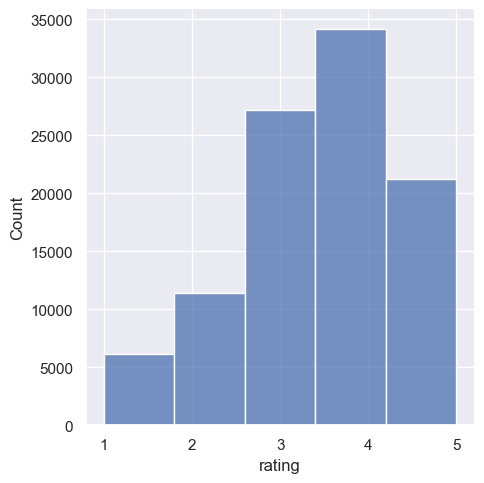

In [71]:
# Make a histogram of the rating
sns.displot(rating_df['rating'], bins=5)

<Figure size 2000x600 with 0 Axes>

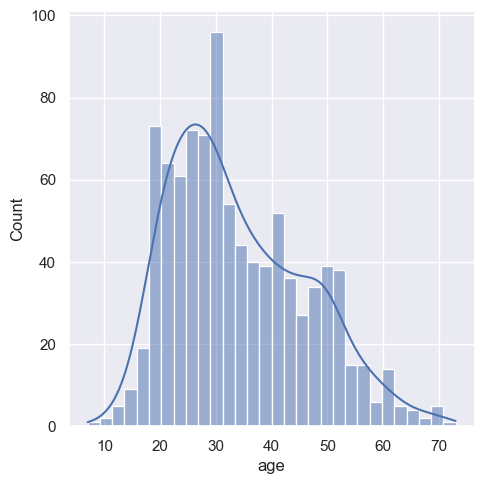

In [73]:
# Make a histogram of the age.
sns.displot(user_df['age'], bins=30, kde=True)

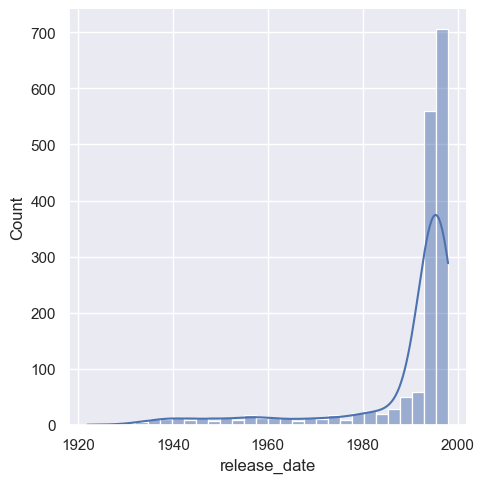

In [101]:
# Make a histogram of the release date.
sns.displot(movie_df['release_date'], bins=30, kde=True)

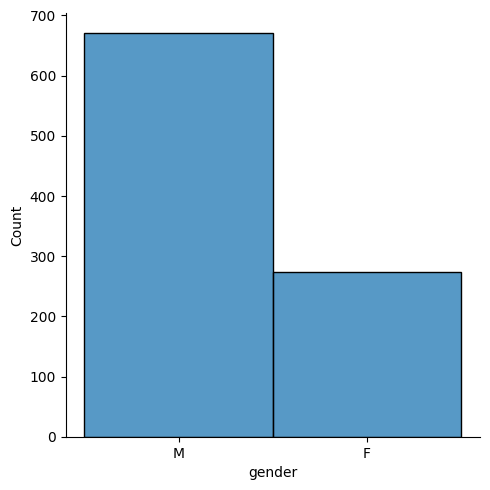

In [51]:
# Make a bar graph for gender.
sns.displot(user_df['gender'], bins=2)

<Axes: xlabel='count', ylabel='occupation'>

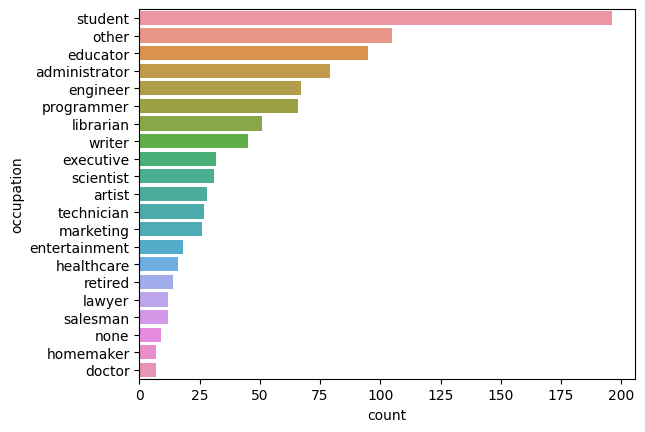

In [56]:
# Make a countplot for occupation, order by the most common.
sns.countplot(y=user_df['occupation'], order=user_df['occupation'].value_counts().index)

In [104]:
genre_by_year = movie_df.groupby('release_date').sum()
genre_by_year = genre_by_year.drop(columns = ['item_id', 'title', 'video_release_date', 'imdb_url', 'unknown']).T
genre_by_year


release_date,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
children,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
film_noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


In [108]:
# Get the proportion for each genre that year.
genre_by_year = genre_by_year.div(genre_by_year.sum(axis=0), axis=1)
genre_by_year

release_date,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
action,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.206897,0.159091,0.057143,0.115942,0.094787,0.084986,0.104987,0.078712,0.092742,0.102564
adventure,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.137931,0.022727,0.028571,0.014493,0.042654,0.036827,0.057743,0.042934,0.040323,0.025641
animation,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.1,...,0.000000,0.000000,0.028571,0.028986,0.004739,0.011331,0.015748,0.016100,0.006048,0.000000
children,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.1,...,0.000000,0.022727,0.028571,0.014493,0.028436,0.042493,0.055118,0.037567,0.044355,0.008547
comedy,0.0,0.0,0.0,0.000000,0.0,0.333333,0.333333,0.333333,0.5,0.2,...,0.103448,0.136364,0.171429,0.173913,0.184834,0.232295,0.165354,0.193202,0.175403,0.111111
crime,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.034483,0.068182,0.000000,0.072464,0.033175,0.022663,0.028871,0.037567,0.060484,0.059829
documentary,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.045455,0.028571,0.000000,0.018957,0.025496,0.013123,0.032200,0.012097,0.025641
drama,0.0,1.0,1.0,0.000000,0.0,0.000000,0.166667,0.000000,0.5,0.1,...,0.275862,0.272727,0.314286,0.202899,0.303318,0.274788,0.233596,0.304114,0.227823,0.282051
fantasy,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.028571,0.000000,0.000000,0.008499,0.007874,0.010733,0.008065,0.008547
film_noir,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.022727,0.000000,0.000000,0.004739,0.000000,0.002625,0.001789,0.004032,0.017094


<Axes: xlabel='release_date'>

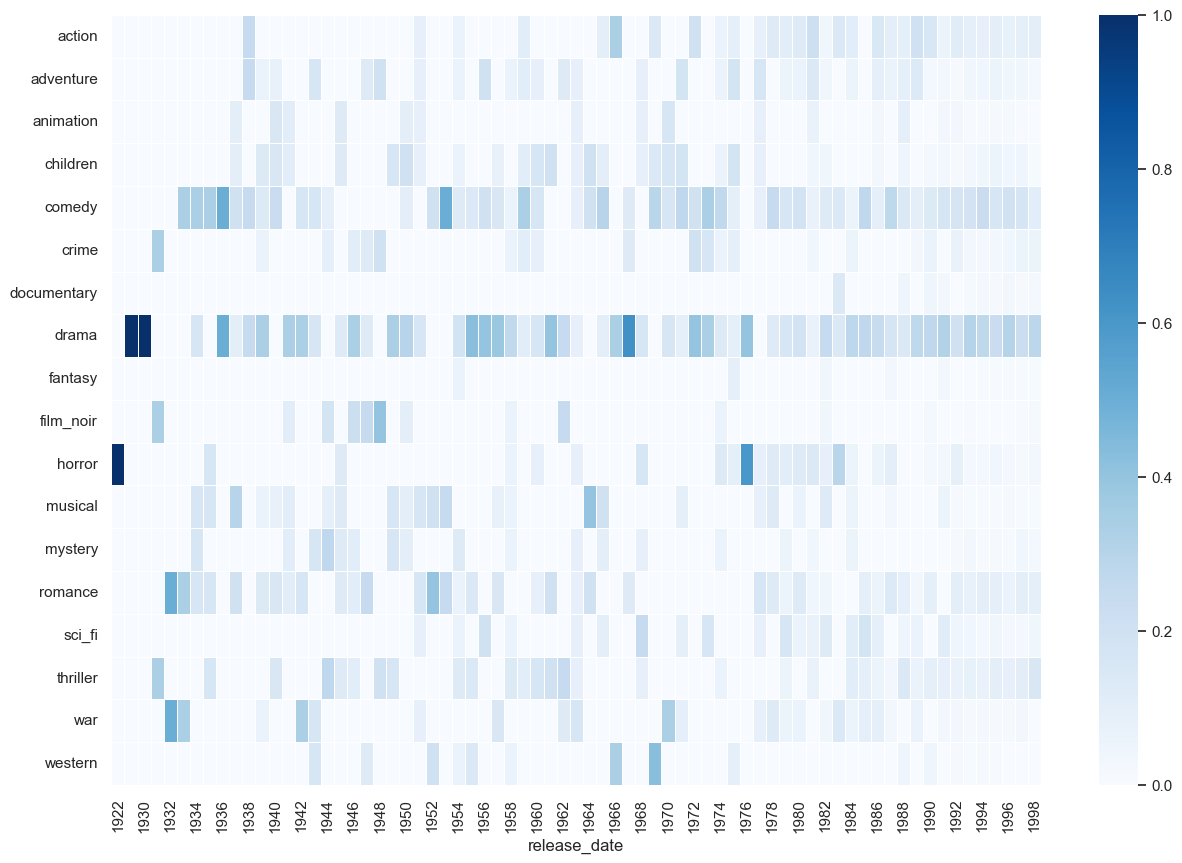

In [109]:
# Plot in a heatmap.
plt.figure(figsize=(15, 10))
sns.heatmap(genre_by_year, cmap='Blues', linewidths=0.5)

In [112]:
# Display the top 10 movies by average rating, as a list/series/dataframe.
# Considering movies with more than 50 ratings.
top_10_movies = rating_df.groupby('item_id').filter(lambda x: len(x) >= 50)
top_10_movies = top_10_movies.groupby('item_id').mean().sort_values(by='rating', ascending=False).head(10)
top_10_movies = top_10_movies.merge(movie_df, on='item_id')
top_10_movies[['title', 'rating']]

,title,rating
0,"Close Shave, A (1995)",4.491071
1,Schindler's List (1993),4.466443
2,"Wrong Trousers, The (1993)",4.466102
3,Casablanca (1942),4.456790
4,Wallace & Gromit: The Best of Aardman Animatio...,4.447761
5,"Shawshank Redemption, The (1994)",4.445230
6,Rear Window (1954),4.387560
7,"Usual Suspects, The (1995)",4.385768
8,Star Wars (1977),4.358491
9,12 Angry Men (1957),4.344000


In [115]:
user_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [128]:
# Merge rating and user dataframes.
rating_user_df = rating_df.merge(user_df, on='user_id')

# merge rating_user_df and movie_df.
rating_user_movie_df = rating_user_df.merge(movie_df, on='item_id')

# Group by gender.
gender_groupped = rating_user_movie_df.groupby('gender').sum().loc[:, 'action':'western']

# Sum all the genres.
# Calculate the proportion of each genre.
gender_groupped.div(gender_groupped.sum(axis=1), axis=0)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
gender,,,,,,,,,,,,,,,,,,
F,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.204987,0.006760,0.007169,0.022290,0.026852,0.024469,0.109085,0.048956,0.094710,0.040763,0.006909
M,0.126803,0.066791,0.016427,0.031155,0.136980,0.039406,0.003594,0.181812,0.006225,0.008484,0.025931,0.022104,0.024741,0.085616,0.063575,0.105649,0.045373,0.009334
